In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Find Class Imbalance

In [2]:
from common.src import resample as res

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
X, y = res.to_numpy_array(path)

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................{0: 1.9448173005219984, 1: 0.6730322580645162}


C:\Users\mmitk\Anaconda3\envs\pnenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [3]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create/Load Model

In [4]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [5]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 200, class_weights = class_weights)

Epoch 1/200
163/163 [==============================] - 60s 367ms/step - loss: 0.5924 - tp: 2236.0000 - fp: 1270.0000 - tn: 3946.0000 - fn: 2980.0000 - accuracy: 0.5926 - precision: 0.6378 - recall: 0.4287 - auc: 0.7023 - val_loss: 0.5683 - val_tp: 209.0000 - val_fp: 133.0000 - val_tn: 171.0000 - val_fn: 95.0000 - val_accuracy: 0.6250 - val_precision: 0.6111 - val_recall: 0.6875 - val_auc: 0.7754
Epoch 2/200
163/163 [==============================] - 57s 352ms/step - loss: 0.3665 - tp: 4332.0000 - fp: 869.0000 - tn: 4347.0000 - fn: 884.0000 - accuracy: 0.8320 - precision: 0.8329 - recall: 0.8305 - auc: 0.9121 - val_loss: 0.6008 - val_tp: 190.0000 - val_fp: 114.0000 - val_tn: 190.0000 - val_fn: 114.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.7559
Epoch 3/200
163/163 [==============================] - 55s 339ms/step - loss: 0.3352 - tp: 4426.0000 - fp: 784.0000 - tn: 4432.0000 - fn: 790.0000 - accuracy: 0.8491 - precision: 0.8495 - recall: 0.8485 

Epoch 22/200
163/163 [==============================] - 58s 358ms/step - loss: 0.1652 - tp: 4883.0000 - fp: 342.0000 - tn: 4874.0000 - fn: 333.0000 - accuracy: 0.9353 - precision: 0.9345 - recall: 0.9362 - auc: 0.9814 - val_loss: 0.4599 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8398
Epoch 23/200
163/163 [==============================] - 57s 352ms/step - loss: 0.1622 - tp: 4874.0000 - fp: 349.0000 - tn: 4867.0000 - fn: 342.0000 - accuracy: 0.9338 - precision: 0.9332 - recall: 0.9344 - auc: 0.9826 - val_loss: 0.3385 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9277
Epoch 24/200
163/163 [==============================] - 51s 311ms/step - loss: 0.1579 - tp: 4859.0000 - fp: 356.0000 - tn: 4860.0000 - fn: 357.0000 - accuracy: 0.9317 - precision: 0.9317 - recall: 0.9316 - 

Epoch 43/200
163/163 [==============================] - 50s 304ms/step - loss: 0.1459 - tp: 4898.0000 - fp: 323.0000 - tn: 4893.0000 - fn: 318.0000 - accuracy: 0.9386 - precision: 0.9381 - recall: 0.9390 - auc: 0.9852 - val_loss: 0.3248 - val_tp: 266.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 38.0000 - val_accuracy: 0.8438 - val_precision: 0.8235 - val_recall: 0.8750 - val_auc: 0.9355
Epoch 44/200
163/163 [==============================] - 50s 306ms/step - loss: 0.1495 - tp: 4877.0000 - fp: 339.0000 - tn: 4877.0000 - fn: 339.0000 - accuracy: 0.9350 - precision: 0.9350 - recall: 0.9350 - auc: 0.9852 - val_loss: 0.2539 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9883
Epoch 45/200
163/163 [==============================] - 51s 311ms/step - loss: 0.1438 - tp: 4904.0000 - fp: 314.0000 - tn: 4902.0000 - fn: 312.0000 - accuracy: 0.9400 - precision: 0.9398 - recall: 0.9402 - 

Epoch 64/200
163/163 [==============================] - 51s 311ms/step - loss: 0.1214 - tp: 4957.0000 - fp: 261.0000 - tn: 4955.0000 - fn: 259.0000 - accuracy: 0.9502 - precision: 0.9500 - recall: 0.9503 - auc: 0.9900 - val_loss: 0.2811 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9531
Epoch 65/200
163/163 [==============================] - 50s 306ms/step - loss: 0.1222 - tp: 4958.0000 - fp: 261.0000 - tn: 4955.0000 - fn: 258.0000 - accuracy: 0.9502 - precision: 0.9500 - recall: 0.9505 - auc: 0.9896 - val_loss: 0.2865 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9648
Epoch 66/200
163/163 [==============================] - 50s 308ms/step - loss: 0.1188 - tp: 4962.0000 - fp: 254.0000 - tn: 4962.0000 - fn: 254.0000 - accuracy: 0.9513 - precision: 0.9513 - recall: 0.9513 - 

Epoch 85/200
163/163 [==============================] - 50s 306ms/step - loss: 0.1168 - tp: 4966.0000 - fp: 249.0000 - tn: 4967.0000 - fn: 250.0000 - accuracy: 0.9522 - precision: 0.9523 - recall: 0.9521 - auc: 0.9899 - val_loss: 0.2550 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9961
Epoch 86/200
163/163 [==============================] - 50s 305ms/step - loss: 0.1197 - tp: 4966.0000 - fp: 249.0000 - tn: 4967.0000 - fn: 250.0000 - accuracy: 0.9522 - precision: 0.9523 - recall: 0.9521 - auc: 0.9904 - val_loss: 0.2785 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9727
Epoch 87/200
163/163 [==============================] - 50s 309ms/step - loss: 0.1194 - tp: 4959.0000 - fp: 260.0000 - tn: 4956.0000 - fn: 257.0000 - accuracy: 0.9504 - precision: 0.9502 - recall: 0.9507 - 

Epoch 106/200
163/163 [==============================] - 59s 360ms/step - loss: 0.1092 - tp: 4979.0000 - fp: 237.0000 - tn: 4979.0000 - fn: 237.0000 - accuracy: 0.9546 - precision: 0.9546 - recall: 0.9546 - auc: 0.9919 - val_loss: 0.3376 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.9082
Epoch 107/200
163/163 [==============================] - 59s 360ms/step - loss: 0.1073 - tp: 4985.0000 - fp: 231.0000 - tn: 4985.0000 - fn: 231.0000 - accuracy: 0.9557 - precision: 0.9557 - recall: 0.9557 - auc: 0.9919 - val_loss: 0.2397 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9961
Epoch 108/200
163/163 [==============================] - 59s 362ms/step - loss: 0.1073 - tp: 4999.0000 - fp: 218.0000 - tn: 4998.0000 - fn: 217.0000 - accuracy: 0.9583 - precision: 0.9582 - recall: 0.9584

Epoch 127/200
163/163 [==============================] - 50s 306ms/step - loss: 0.0988 - tp: 5015.0000 - fp: 201.0000 - tn: 5015.0000 - fn: 201.0000 - accuracy: 0.9615 - precision: 0.9615 - recall: 0.9615 - auc: 0.9930 - val_loss: 0.2827 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9648
Epoch 128/200
163/163 [==============================] - 51s 312ms/step - loss: 0.1050 - tp: 5007.0000 - fp: 211.0000 - tn: 5005.0000 - fn: 209.0000 - accuracy: 0.9597 - precision: 0.9596 - recall: 0.9599 - auc: 0.9927 - val_loss: 0.2627 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9746
Epoch 129/200
163/163 [==============================] - 51s 311ms/step - loss: 0.1022 - tp: 5017.0000 - fp: 201.0000 - tn: 5015.0000 - fn: 199.0000 - accuracy: 0.9617 - precision: 0.9615 - recall: 0.9618

Epoch 148/200
163/163 [==============================] - 60s 367ms/step - loss: 0.0989 - tp: 5009.0000 - fp: 208.0000 - tn: 5008.0000 - fn: 207.0000 - accuracy: 0.9602 - precision: 0.9601 - recall: 0.9603 - auc: 0.9926 - val_loss: 0.2731 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9648
Epoch 149/200
163/163 [==============================] - 58s 357ms/step - loss: 0.1037 - tp: 5002.0000 - fp: 214.0000 - tn: 5002.0000 - fn: 214.0000 - accuracy: 0.9590 - precision: 0.9590 - recall: 0.9590 - auc: 0.9927 - val_loss: 0.3691 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9180
Epoch 150/200
163/163 [==============================] - 58s 358ms/step - loss: 0.1037 - tp: 5011.0000 - fp: 206.0000 - tn: 5010.0000 - fn: 205.0000 - accuracy: 0.9606 - precision: 0.9605 - recall: 0.9607

Epoch 169/200
163/163 [==============================] - 69s 423ms/step - loss: 0.0868 - tp: 5038.0000 - fp: 178.0000 - tn: 5038.0000 - fn: 178.0000 - accuracy: 0.9659 - precision: 0.9659 - recall: 0.9659 - auc: 0.9939 - val_loss: 0.2553 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9492
Epoch 170/200
163/163 [==============================] - 68s 414ms/step - loss: 0.0971 - tp: 5021.0000 - fp: 196.0000 - tn: 5020.0000 - fn: 195.0000 - accuracy: 0.9625 - precision: 0.9624 - recall: 0.9626 - auc: 0.9933 - val_loss: 0.3190 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9336
Epoch 171/200
163/163 [==============================] - 60s 366ms/step - loss: 0.0902 - tp: 5042.0000 - fp: 175.0000 - tn: 5041.0000 - fn: 174.0000 - accuracy: 0.9665 - precision: 0.9665 - recall: 0.9666

Epoch 190/200
163/163 [==============================] - 51s 313ms/step - loss: 0.0875 - tp: 5024.0000 - fp: 192.0000 - tn: 5024.0000 - fn: 192.0000 - accuracy: 0.9632 - precision: 0.9632 - recall: 0.9632 - auc: 0.9948 - val_loss: 0.2374 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9805
Epoch 191/200
163/163 [==============================] - 50s 310ms/step - loss: 0.0895 - tp: 5027.0000 - fp: 189.0000 - tn: 5027.0000 - fn: 189.0000 - accuracy: 0.9638 - precision: 0.9638 - recall: 0.9638 - auc: 0.9936 - val_loss: 0.2919 - val_tp: 266.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 38.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9531
Epoch 192/200
163/163 [==============================] - 51s 312ms/step - loss: 0.0889 - tp: 5031.0000 - fp: 185.0000 - tn: 5031.0000 - fn: 185.0000 - accuracy: 0.9645 - precision: 0.9645 - recall: 0.9645

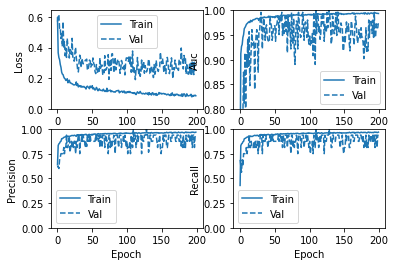

In [6]:
cnn.plot_history()

In [7]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.92      0.89      0.90       234
   PNEUMONIA       0.93      0.95      0.94       390

    accuracy                           0.93       624
   macro avg       0.93      0.92      0.92       624
weighted avg       0.93      0.93      0.93       624

None


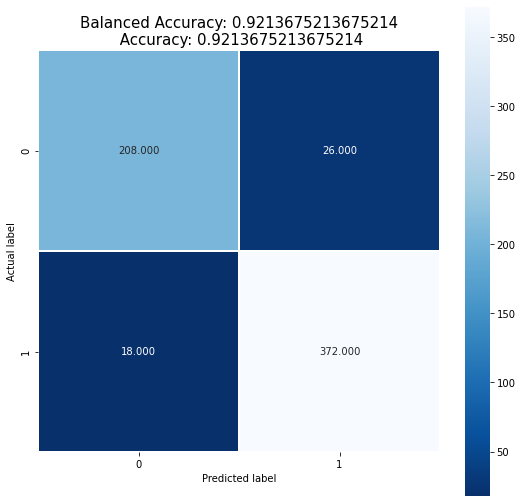

In [8]:
cnn.display_confusion_matrix(test_data_generator = test_set)